# Load the Data

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
tcs = pd.read_csv("./TCS.csv")
tcs.shape

(4447, 7)

# Data Splitting

In [64]:
# Check the date range of the dataset
earliest_date = tcs['Date'].min()
latest_date = tcs['Date'].max()

earliest_date, latest_date


('2005-12-02', '2023-12-01')

In [65]:
# Calculate the number of rows for the split
total_rows = len(tcs)
split_point = int(total_rows * 0.7)

# Split the data into training and testing sets
train_data = tcs[:split_point]
test_data = tcs[split_point:]

# Display the number of rows in each set and the respective date ranges
train_rows = len(train_data)
test_rows = len(test_data)
train_date_range = (train_data['Date'].min(), train_data['Date'].max())
test_date_range = (test_data['Date'].min(), test_data['Date'].max())

train_rows, train_date_range, test_rows, test_date_range


(3112, ('2005-12-02', '2018-07-04'), 1335, ('2018-07-05', '2023-12-01'))

In [66]:
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-12-02,194.332504,196.800003,192.632507,193.750000,139.145081,4784360.0
1,2005-12-05,194.000000,194.262497,190.782501,191.419998,137.471786,1913080.0
2,2005-12-06,191.875000,196.250000,190.787506,194.250000,139.504196,3233064.0
3,2005-12-07,195.250000,200.000000,195.037506,199.445007,143.235077,5618952.0
4,2005-12-08,199.375000,203.087494,199.032501,202.070007,145.120239,9585192.0


# EDA (Exploratory data analysis)

In [67]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3105.000000,3105.000000,3105.000000,3105.000000,3105.000000,3.105000e+03
mean,725.912721,734.291746,717.146037,725.672073,599.328817,3.461626e+06
std,453.051101,456.940341,449.363857,453.124224,403.139225,3.070541e+06
min,112.000000,116.112503,103.837502,111.550003,83.785233,0.000000e+00
25%,286.250000,289.225006,281.000000,285.250000,208.736298,1.874468e+06
50%,601.500000,608.500000,592.375000,599.599976,471.557800,2.716008e+06
75%,1202.650024,1214.000000,1191.750000,1202.525024,1027.589966,4.163292e+06
max,1879.900024,1885.150024,1857.150024,1874.050049,1674.508301,8.806715e+07


In [68]:
train_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [69]:
# Convert 'Date' column to datetime type for both training and testing data
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

# Verify the conversion by checking the data types
train_data.dtypes, test_data.dtypes


<ipython-input-69-d8d3ab12b180>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Date'] = pd.to_datetime(train_data['Date'])
<ipython-input-69-d8d3ab12b180>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Date'] = pd.to_datetime(test_data['Date'])


(Date         datetime64[ns]
 Open                float64
 High                float64
 Low                 float64
 Close               float64
 Adj Close           float64
 Volume              float64
 dtype: object,
 Date         datetime64[ns]
 Open                float64
 High                float64
 Low                 float64
 Close               float64
 Adj Close           float64
 Volume              float64
 dtype: object)

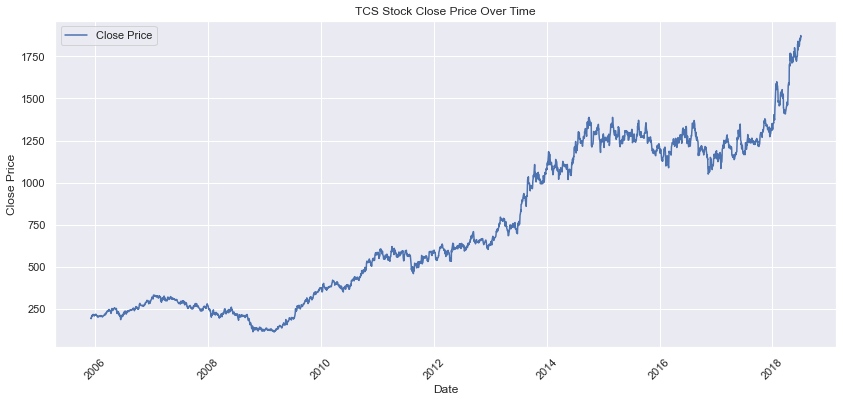

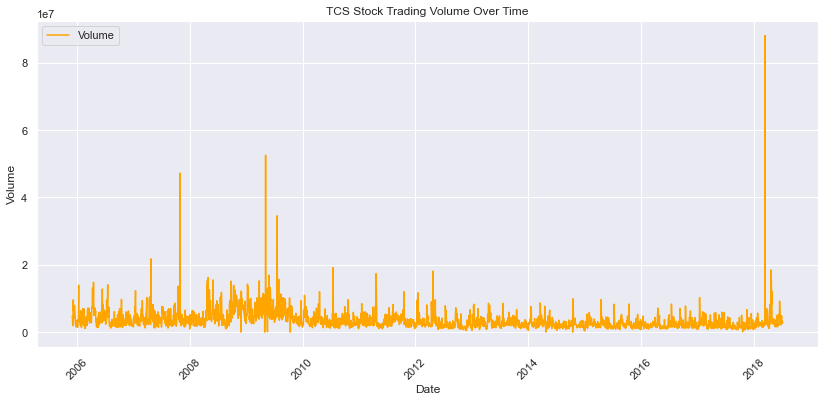

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="darkgrid")

# Plotting 'Close' price over time
plt.figure(figsize=(14, 6))
plt.plot(train_data['Date'], train_data['Close'], label='Close Price')
plt.title('TCS Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plotting 'Volume' over time
plt.figure(figsize=(14, 6))
plt.plot(train_data['Date'], train_data['Volume'], label='Volume', color='orange')
plt.title('TCS Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [71]:
# Adjusting the moving averages to 30-day and 100-day
short_window = 30
long_window = 100

train_data['Short_MA'] = train_data['Close'].rolling(window=short_window, min_periods=1).mean()
train_data['Long_MA'] = train_data['Close'].rolling(window=long_window, min_periods=1).mean()



<ipython-input-71-94a2388581bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Short_MA'] = train_data['Close'].rolling(window=short_window, min_periods=1).mean()
<ipython-input-71-94a2388581bd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Long_MA'] = train_data['Close'].rolling(window=long_window, min_periods=1).mean()


In [72]:
# Update the trading signals
train_data['Signal'] = 0
train_data.loc[short_window:, 'Signal'] = np.where(
    train_data['Short_MA'][short_window:] > train_data['Long_MA'][short_window:], 1, 0)
train_data['Position'] = train_data['Signal'].diff()

# Remove rows with NaN values (primarily at the beginning of the dataset)
train_data.dropna(inplace=True)

train_data.head()

<ipython-input-72-03d24c7c6acb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Signal'] = 0
c:\users\garvs\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-72-03d24c7c6acb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,Date,Open,High,Low,Close,Adj Close,Volume,Short_MA,Long_MA,Signal,Position
1,2005-12-05,194.000,194.262497,190.782501,191.419998,137.471786,1913080.0,192.584999,192.584999,0,0.0
2,2005-12-06,191.875,196.250000,190.787506,194.250000,139.504196,3233064.0,193.139999,193.139999,0,0.0
3,2005-12-07,195.250,200.000000,195.037506,199.445007,143.235077,5618952.0,194.716251,194.716251,0,0.0
4,2005-12-08,199.375,203.087494,199.032501,202.070007,145.120239,9585192.0,196.187002,196.187002,0,0.0
5,2005-12-09,202.250,211.824997,201.412506,210.337494,151.057678,6194224.0,198.545418,198.545418,0,0.0


In [74]:
initial_capital = 100000
position = 100

In [75]:
# Backtesting the updated Moving Averages Strategy
# Resetting the portfolio for the moving averages strategy
ma_portfolio = pd.DataFrame(index=train_data.index)
ma_portfolio['Position'] = train_data['Signal'] * position
ma_portfolio['Cash'] = initial_capital - (ma_portfolio['Position'].diff() * train_data['Close']).cumsum()
ma_portfolio['Total'] = ma_portfolio['Cash'] + (train_data['Close'] * ma_portfolio['Position'])
ma_portfolio['Returns'] = ma_portfolio['Total'].pct_change()

# Sharpe Ratio and Maximum Drawdown for the updated moving averages strategy
ma_sharpe_ratio = ma_portfolio['Returns'].mean() / ma_portfolio['Returns'].std() * np.sqrt(252)
ma_roll_max = ma_portfolio['Total'].cummax()
ma_daily_drawdown = ma_portfolio['Total']/ma_roll_max - 1.0
ma_max_drawdown = ma_daily_drawdown.cummin().min()

# Implementing the Buy-and-Hold Strategy on the train data
bh_portfolio = pd.DataFrame(index=train_data.index)
bh_portfolio['Holdings'] = initial_capital / train_data['Close'].iloc[0] * train_data['Close']
bh_portfolio['Total'] = bh_portfolio['Holdings']
bh_portfolio['Returns'] = bh_portfolio['Total'].pct_change()

# Sharpe Ratio and Maximum Drawdown for the buy-and-hold strategy
bh_sharpe_ratio = bh_portfolio['Returns'].mean() / bh_portfolio['Returns'].std() * np.sqrt(252)
bh_roll_max = bh_portfolio['Total'].cummax()
bh_daily_drawdown = bh_portfolio['Total']/bh_roll_max - 1.0
bh_max_drawdown = bh_daily_drawdown.cummin().min()

# Results
ma_portfolio.tail(), ma_sharpe_ratio, ma_max_drawdown, bh_portfolio.tail(), bh_sharpe_ratio, bh_max_drawdown


(      Position        Cash        Total   Returns
 3107       100 -11331.7383  172938.2568 -0.008770
 3108       100 -11331.7383  173443.2617  0.002920
 3109       100 -11331.7383  173803.2593  0.002076
 3110       100 -11331.7383  176073.2666  0.013061
 3111       100 -11331.7383  175283.2641 -0.004487,
 0.4316761077732605,
 -0.3660147198593354,
            Holdings          Total   Returns
 3107  962647.565695  962647.565695 -0.008235
 3108  965285.769149  965285.769149  0.002741
 3109  967166.437856  967166.437856  0.001948
 3110  979025.216059  979025.216059  0.012261
 3111  974898.152491  974898.152491 -0.004215,
 0.7389535882483962,
 -0.6635880272372394)

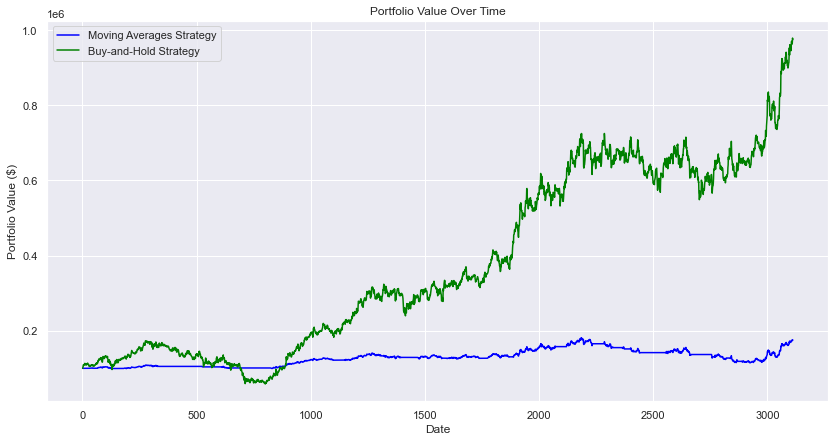

In [76]:
import matplotlib.pyplot as plt

# Plotting the portfolio values over time
plt.figure(figsize=(14, 7))

# Moving Averages Strategy
plt.plot(ma_portfolio['Total'], label='Moving Averages Strategy', color='blue')

# Buy-and-Hold Strategy
plt.plot(bh_portfolio['Total'], label='Buy-and-Hold Strategy', color='green')

plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


In [77]:
# Final wealth for both strategies
final_wealth_ma_strategy = ma_portfolio['Total'].iloc[-1]
final_wealth_bh_strategy = bh_portfolio['Total'].iloc[-1]

final_wealth_ma_strategy, final_wealth_bh_strategy


(175283.2641, 974898.1524908383)

# Machine learning models

In [78]:
# Reload the data as the previous session state was reset
file_path = './TCS.csv'
data = pd.read_csv(file_path)

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])



In [81]:
# Splitting the data into a 70-30 train-test split
split_point = int(len(data) * 0.7)
train_data = data[:split_point]
test_data = data[split_point:]

# Displaying the number of rows in each set and the respective date ranges
train_data_info = (len(train_data), train_data['Date'].min(), train_data['Date'].max())
test_data_info = (len(test_data), test_data['Date'].min(), test_data['Date'].max())

train_data_info, test_data_info


((3112, Timestamp('2005-12-02 00:00:00'), Timestamp('2018-07-04 00:00:00')),
 (1335, Timestamp('2018-07-05 00:00:00'), Timestamp('2023-12-01 00:00:00')))

In [82]:
# Descriptive statistics for the training data
train_data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,3105.000000,3105.000000,3105.000000,3105.000000,3105.000000,3.105000e+03
mean,725.912721,734.291746,717.146037,725.672073,599.328817,3.461626e+06
std,453.051101,456.940341,449.363857,453.124224,403.139225,3.070541e+06
min,112.000000,116.112503,103.837502,111.550003,83.785233,0.000000e+00
25%,286.250000,289.225006,281.000000,285.250000,208.736298,1.874468e+06
50%,601.500000,608.500000,592.375000,599.599976,471.557800,2.716008e+06
75%,1202.650024,1214.000000,1191.750000,1202.525024,1027.589966,4.163292e+06
max,1879.900024,1885.150024,1857.150024,1874.050049,1674.508301,8.806715e+07


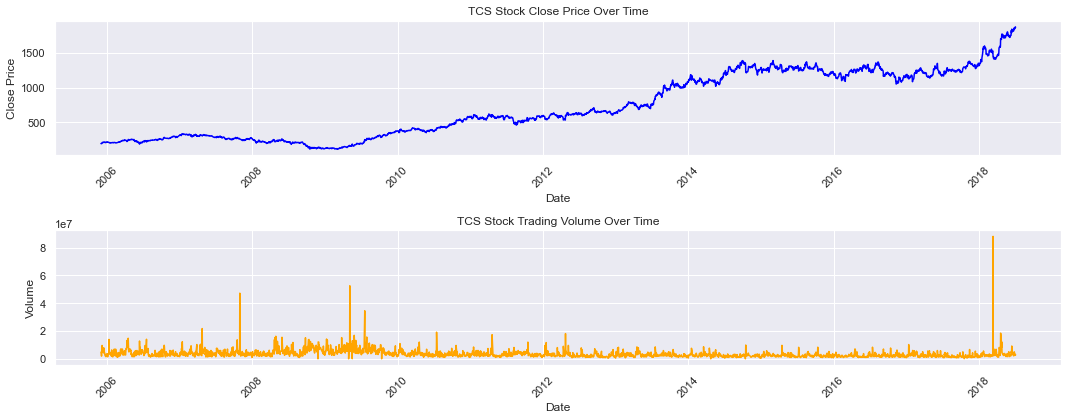

In [83]:
# Visualization of key features over time
plt.figure(figsize=(15, 6))

# Plotting 'Close' price over time
plt.subplot(2, 1, 1)
plt.plot(train_data['Date'], train_data['Close'], label='Close Price', color='blue')
plt.title('TCS Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

# Plotting 'Volume' over time
plt.subplot(2, 1, 2)
plt.plot(train_data['Date'], train_data['Volume'], label='Volume', color='orange')
plt.title('TCS Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<h2> Feature Creation </h2>

Relative Strength Index (RSI): Measures the magnitude of recent price changes to evaluate overbought or oversold conditions.

Moving Average Convergence Divergence (MACD): A trend-following momentum indicator showing the relationship between two moving averages of a security’s price.

Bollinger Bands: A set of lines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of the security's price.

On-Balance Volume (OBV): uses volume flow to predict changes in stock price.

In [91]:
# Calculating RSI, MACD, Bollinger Bands, and OBV

# RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

train_data['RSI'] = calculate_rsi(train_data['Close'])

# MACD (Moving Average Convergence Divergence)
def calculate_macd(data, fastperiod=12, slowperiod=26, signalperiod=9):
    fast_ema = data.ewm(span=fastperiod, adjust=False).mean()
    slow_ema = data.ewm(span=slowperiod, adjust=False).mean()
    macd = fast_ema - slow_ema
    signal_line = macd.ewm(span=signalperiod, adjust=False).mean()
    macd_histogram = macd - signal_line
    return macd, signal_line, macd_histogram

train_data['MACD'], train_data['MACDsignal'], train_data['MACDhist'] = calculate_macd(train_data['Close'])

# Bollinger Bands
def calculate_bollinger_bands(data, window=20, num_std=2):
    sma = data.rolling(window=window).mean()
    rstd = data.rolling(window=window).std()
    upper_band = sma + num_std * rstd
    lower_band = sma - num_std * rstd
    return upper_band, sma, lower_band

train_data['BB_upper'], train_data['BB_middle'], train_data['BB_lower'] = calculate_bollinger_bands(train_data['Close'])

# On-Balance Volume (OBV)
def calculate_obv(close_prices, volumes):
    obv = [0]
    for i in range(1, len(close_prices)):
        if close_prices.iloc[i] > close_prices.iloc[i-1]:
            obv.append(obv[-1] + volumes.iloc[i])
        elif close_prices.iloc[i] < close_prices.iloc[i-1]:
            obv.append(obv[-1] - volumes.iloc[i])
        else:
            obv.append(obv[-1])
    return pd.Series(obv, index=close_prices.index)

train_data['OBV'] = calculate_obv(train_data['Close'], train_data['Volume'])


In [92]:
# Drop NaN values created by lagging and moving averages
train_data = train_data.dropna()

# Displaying the head of the cleaned data with new features
train_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Prev_Close,Prev_High,Prev_Low,MA_10,RSI,MACD,MACDsignal,MACDhist,BB_upper,BB_middle,BB_lower,OBV
28,2006-01-12,206.625000,211.125000,201.875000,209.212494,150.249756,13919696.0,209.062500,212.475006,207.625000,213.124248,47.743312,0.176844,0.606698,-0.429854,218.115248,212.278000,206.440752,5118024.0
29,2006-01-13,210.000000,211.250000,205.500000,206.470001,148.280197,3608568.0,209.212494,211.125000,201.875000,212.395497,46.043051,-0.280943,0.429170,-0.710113,218.427034,212.084000,205.740965,1509456.0
30,2006-01-16,206.375000,206.375000,200.320007,201.095001,144.420074,4804912.0,206.470001,211.250000,205.500000,211.219247,40.563338,-1.065182,0.130299,-1.195481,219.347607,211.423749,203.499892,-3295456.0
31,2006-01-17,201.375000,205.000000,201.250000,202.925003,145.734299,3753056.0,201.095001,206.375000,200.320007,210.416748,35.960034,-1.521492,-0.200059,-1.321433,219.085482,210.728999,202.372517,457600.0
32,2006-01-18,202.274994,202.975006,200.262497,202.445007,145.658798,3165120.0,202.925003,205.000000,201.250000,208.996249,37.169038,-1.899951,-0.540037,-1.359914,219.387481,210.266875,201.146269,-2707520.0


In [93]:
# Calculating the correlation matrix
correlation_matrix = train_data.corr()

# Displaying the correlation matrix
correlation_matrix


,Open,High,Low,Close,Adj Close,Volume,Prev_Close,Prev_High,Prev_Low,MA_10,RSI,MACD,MACDsignal,MACDhist,BB_upper,BB_middle,BB_lower,OBV
Open,1.000000,0.999814,0.999818,0.999638,0.998314,-0.307426,0.999912,0.999786,0.999755,0.999119,0.048477,0.249709,0.260531,0.029316,0.997851,0.997995,0.996052,0.906997
High,0.999814,1.000000,0.999803,0.999866,0.998540,-0.304233,0.999760,0.999653,0.999582,0.998971,0.052285,0.251853,0.261529,0.032872,0.997772,0.997786,0.995700,0.906998
Low,0.999818,0.999803,1.000000,0.999846,0.998550,-0.309961,0.999760,0.999585,0.999632,0.999009,0.052065,0.249951,0.259948,0.031571,0.997680,0.997888,0.996015,0.907192
Close,0.999638,0.999866,0.999846,1.000000,0.998684,-0.307119,0.999585,0.999433,0.999439,0.998852,0.054648,0.250677,0.259690,0.034363,0.997607,0.997709,0.995722,0.907228
Adj Close,0.998314,0.998540,0.998550,0.998684,1.000000,-0.298078,0.998281,0.998120,0.998154,0.997584,0.051132,0.249019,0.258108,0.033774,0.996430,0.996474,0.994425,0.889351
Volume,-0.307426,-0.304233,-0.309961,-0.307119,-0.298078,1.000000,-0.306329,-0.304650,-0.307501,-0.307265,0.012330,-0.018746,-0.022823,0.006500,-0.303432,-0.308961,-0.314350,-0.374757
Prev_Close,0.999912,0.999760,0.999760,0.999585,0.998281,-0.306329,1.000000,0.999866,0.999845,0.999166,0.048128,0.250014,0.260903,0.029209,0.997877,0.998022,0.996080,0.906989
Prev_High,0.999786,0.999653,0.999585,0.999433,0.998120,-0.304650,0.999866,1.000000,0.999803,0.999260,0.045595,0.250422,0.262468,0.026221,0.998043,0.998091,0.996043,0.906726
Prev_Low,0.999755,0.999582,0.999632,0.999439,0.998154,-0.307501,0.999845,0.999803,1.000000,0.999289,0.045699,0.248527,0.260778,0.025232,0.997913,0.998185,0.996381,0.906942
MA_10,0.999119,0.998971,0.999009,0.998852,0.997584,-0.307265,0.999166,0.999260,0.999289,1.000000,0.026212,0.232987,0.254725,-0.003672,0.998954,0.999377,0.997736,0.906715


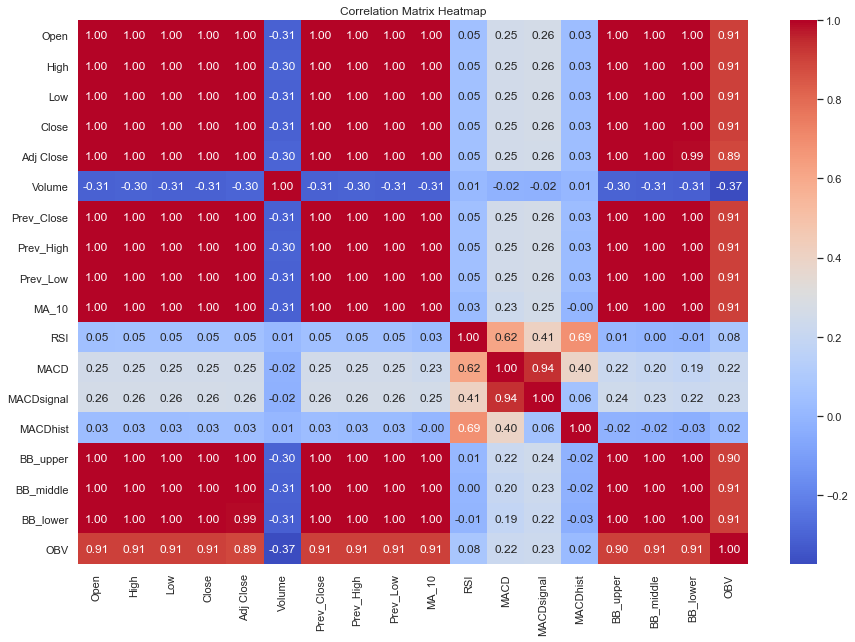

In [94]:
import seaborn as sns

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


We can see a lot of highly correlated objects. Let's reduce the features.

In [95]:
# Feature Selection
selected_features = ['Prev_Close', 'Prev_High', 'Prev_Low', 'MA_10', 'RSI', 
                     'MACD', 'MACDsignal', 'MACDhist', 'BB_upper', 'BB_middle', 
                     'BB_lower', 'OBV']


In [96]:
# It appears that we need to create some missing lagged features and additional moving averages

# Creating missing features
train_data['Prev_Close'] = train_data['Close'].shift(1)
train_data['Prev_High'] = train_data['High'].shift(1)
train_data['Prev_Low'] = train_data['Low'].shift(1)
train_data['MA_10'] = train_data['Close'].rolling(window=10).mean()

# Dropping NaN values that were created due to shifting and rolling
train_data = train_data.dropna()

# Re-selecting the features after creating the missing ones
X = train_data[selected_features]

# Target Variable - Next day's closing price
y = train_data['Close'].shift(-1)  # shift upward to align previous features with next day's close

# Dropping the last row which now has NaN as the target variable
X = X[:-1]
y = y[:-1]

In [97]:
X.head()

,Prev_Close,Prev_High,Prev_Low,MA_10,RSI,MACD,MACDsignal,MACDhist,BB_upper,BB_middle,BB_lower,OBV
37,205.324997,206.125000,203.800003,204.843750,31.110714,-1.871853,-1.490233,-0.381620,219.196668,209.058749,198.920831,3548496.0
38,206.399994,207.494995,205.437500,204.662001,34.780433,-1.646831,-1.521552,-0.125278,219.025860,208.893124,198.760388,6552312.0
39,207.395004,210.000000,206.324997,204.751251,39.087763,-1.454357,-1.508113,0.053757,218.460414,208.573374,198.686334,5169168.0
40,207.362503,209.949997,206.512497,205.521751,45.556416,-1.172312,-1.440953,0.268641,218.051777,208.370499,198.689222,6672328.0
41,208.800003,209.949997,206.544998,206.062501,48.511122,-0.975270,-1.347817,0.372546,217.844546,208.239625,198.634703,2775632.0


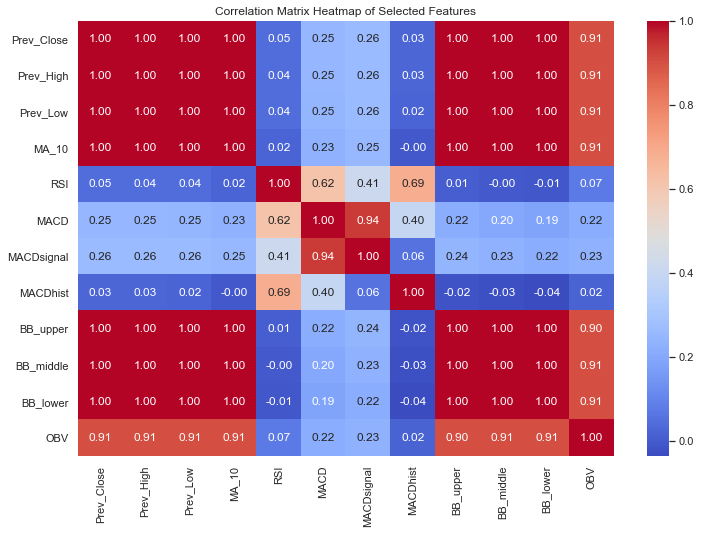

In [98]:
# Calculating the correlation matrix for the selected features
selected_features_correlation_matrix = train_data[selected_features].corr()

# Plotting the heatmap for the correlation matrix of selected features
plt.figure(figsize=(12, 8))
sns.heatmap(selected_features_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap of Selected Features')
plt.show()


In [99]:
# Feature Selection
selected_features = ['MA_10', 'RSI', 'MACD', 'MACDhist', 'OBV']

In [100]:
X[selected_features]

,MA_10,RSI,MACD,MACDhist,OBV
37,204.843750,31.110714,-1.871853,-0.381620,3548496.0
38,204.662001,34.780433,-1.646831,-0.125278,6552312.0
39,204.751251,39.087763,-1.454357,0.053757,5169168.0
40,205.521751,45.556416,-1.172312,0.268641,6672328.0
41,206.062501,48.511122,-0.975270,0.372546,2775632.0
...,...,...,...,...,...
3106,1826.195007,73.911354,30.432013,2.990336,225778928.0
3107,1831.709998,68.398769,30.120434,2.143005,220890803.0
3108,1832.479993,68.694004,29.935919,1.566793,224397079.0
3109,1834.714990,64.996802,29.737384,1.094606,227047369.0


In [101]:
from sklearn.preprocessing import StandardScaler
# Preprocessing - Scaling the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[selected_features])

# Displaying the first few rows of features and target
X_scaled[:5], y[:5]


(array([[-1.16539699, -1.37638865, -0.43226972, -0.09663681, -1.24592351],
        [-1.16580099, -1.14436957, -0.4144489 , -0.03785508, -1.21733612],
        [-1.1656026 , -0.87203729, -0.39920575,  0.00319943, -1.23049954],
        [-1.16388992, -0.46305476, -0.37686895,  0.05247466, -1.21619393],
        [-1.16268792, -0.2762426 , -0.36126405,  0.07630117, -1.25327887]]),
 37    207.395004
 38    207.362503
 39    208.800003
 40    208.332504
 41    204.600006
 Name: Close, dtype: float64)

In [102]:
# Preparing the target variable - next day's closing price
y_train = train_data['Close'].shift(-1)[:-1]  # Shift and align with features


In [103]:
y_train.shape

(3067,)

In [104]:
# Checking the size of the final training data and target data
size_X_selected_scaled = X_scaled.shape
size_y_selected = y_train.shape

size_X_selected_scaled, size_y_selected


((3067, 5), (3067,))

In [105]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# RSI Transformer
class RSITransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['RSI'] = calculate_rsi(X_transformed['Close'])
        return X_transformed

# MACD Transformer
class MACDTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        macd, signal, hist = calculate_macd(X_transformed['Close'])
        X_transformed['MACD'] = macd
        X_transformed['MACDsignal'] = signal
        X_transformed['MACDhist'] = hist
        return X_transformed

# Bollinger Bands Transformer
class BollingerBandsTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        upper_band, middle_band, lower_band = calculate_bollinger_bands(X_transformed['Close'])
        X_transformed['BB_upper'] = upper_band
        X_transformed['BB_middle'] = middle_band
        X_transformed['BB_lower'] = lower_band
        return X_transformed

# OBV Transformer
class OBVTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['OBV'] = calculate_obv(X_transformed['Close'], X_transformed['Volume'])
        return X_transformed
    
class NaNRemovalTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.dropna()

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, selected_features):
        self.selected_features = selected_features

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.selected_features]

# Note: Ensure that your calculate_rsi, calculate_macd, calculate_bollinger_bands, and calculate_obv functions
# are defined as in your previous code.


In [106]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Assuming the custom transformer classes (RSITransformer, MACDTransformer, BollingerBandsTransformer, OBVTransformer)
# and the FeatureSelector class have been defined as previously discussed

# Selected features for the model
selected_features = ['RSI', 'MACD', 'OBV', 'High', 'Close']


# Creating the pipeline
pipeline = make_pipeline(
    RSITransformer(),
    MACDTransformer(),
    BollingerBandsTransformer(),
    OBVTransformer(),
    NaNRemovalTransformer(),
    FeatureSelector(selected_features)
)

# # Example usage
# # Assuming 'train_data' is your DataFrame with the necessary columns
# # and 'Close' is the target column

# # Prepare the target variable (next day's closing price)
# y = train_data['Close'].shift(-1)[:-1]

# # Apply the pipeline to transform the features
# X_transformed = pipeline.fit_transform(train_data[:-1])  # Exclude the last row to match the target's size

# # X_transformed and y are now ready for model training


In [107]:
X_transformed = pipeline.fit_transform(train_data)
X_transformed.dropna(inplace=True)

In [108]:
X_transformed

,RSI,MACD,OBV,High,Close
56,58.544239,0.082617,-7460784.0,211.237503,208.820007
57,60.220763,0.254387,-8558120.0,210.000000,208.757507
58,53.443001,0.588486,-6037008.0,211.875000,211.294998
59,57.872414,0.947642,-3215264.0,213.000000,212.600006
60,69.682844,1.611109,1290888.0,218.175003,217.524994
...,...,...,...,...,...
3107,68.398769,30.120434,217342307.0,1871.000000,1842.699951
3108,68.694004,29.935919,220848583.0,1867.400024,1847.750000
3109,64.996802,29.737384,223498873.0,1857.800049,1851.349976
3110,61.662402,31.053781,226741106.0,1879.900024,1874.050049


In [109]:
# Shift the 'Close' column to create the target variable for next day prediction
y_train = X_transformed['Close'].shift(-1)

# Remove the last row from X_transformed as its corresponding target is NaN after shifting
X_train = X_transformed.iloc[:-1, :]

# Drop the 'Close' column from X_train as it's now the target variable
X_train = X_train.drop('Close', axis=1)

# Also, drop the first row from y_train to align with X_train
y_train = y_train.iloc[:-1]

# Check the first few rows of X_train and y_train
print(X_train.shape)
print(y_train.shape)


(3048, 4)
(3048,)


In [110]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the X_train data and transform it
X_train_scaled = scaler.fit_transform(X_train)

In [111]:
X_train_scaled

array([[ 0.35539828, -0.27915063, -1.32848205, -1.16982263],
       [ 0.46120281, -0.26558358, -1.33895111, -1.17254219],
       [ 0.03346192, -0.23919514, -1.31489861, -1.16842166],
       ...,
       [ 0.99594437,  2.07877422,  0.84968799,  2.46978736],
       [ 0.76261599,  2.06309317,  0.8749729 ,  2.44869029],
       [ 0.55218382,  2.16706709,  0.9059052 ,  2.49725756]])

In [112]:
y_train

56       208.757507
57       211.294998
58       212.600006
59       217.524994
60       217.725006
           ...     
3106    1842.699951
3107    1847.750000
3108    1851.349976
3109    1874.050049
3110    1866.150024
Name: Close, Length: 3048, dtype: float64

# Machine Learning Model

<h2> 1. Linear regression

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# You can now use model.predict(X_test_scaled) to make predictions on new, unseen data.

# Optional: Evaluate the model using the training data itself (though it's better to use a separate test set)
y_train_pred = model.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 228.56550262934763
R^2 Score: 0.99887945886728


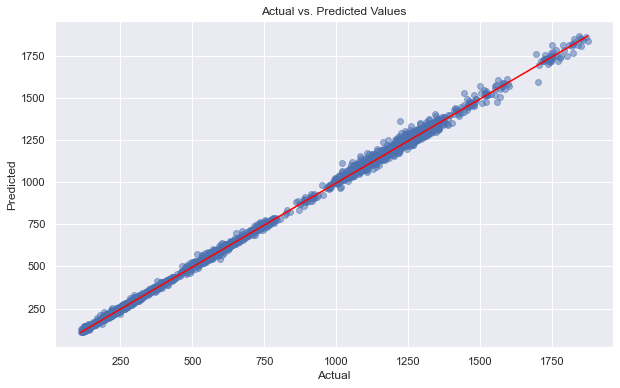

In [114]:
import matplotlib.pyplot as plt

# Predicting the training data
y_train_pred = model.predict(X_train_scaled)

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_train), max(y_train)], [min(y_train_pred), max(y_train_pred)], color='red')  # Regression line
plt.show()


<h3>Observation:</h3>
Clearly Linear Regression is not at all a good choice.

<h2> 2. Random Forest</h2>

In [115]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Optional: Evaluate the model using the training data itself
y_train_pred_rf = rf_model.predict(X_train_scaled)
mse_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_rf = r2_score(y_train, y_train_pred_rf)

print("Random Forest Regressor - Mean Squared Error:", mse_rf)
print("Random Forest Regressor - R^2 Score:", r2_rf)


Random Forest Regressor - Mean Squared Error: 35.839706282880776
Random Forest Regressor - R^2 Score: 0.9998242960349983


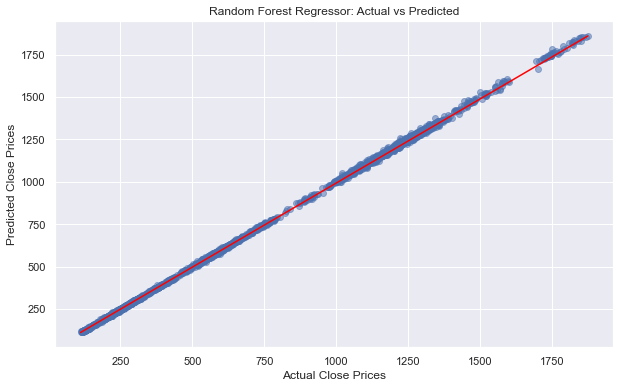

In [116]:
import matplotlib.pyplot as plt

# Assuming rf_model is your trained Random Forest Regressor
# Predict using the Random Forest model
y_train_pred = rf_model.predict(X_train_scaled)

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel('Actual Close Prices')
plt.ylabel('Predicted Close Prices')
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train_pred), max(y_train_pred)], color='red')  # Line for perfect predictions
plt.show()

Clearly Random Forest is performing way better than Linear Regression

<h3> Let's Try some Hyperparameter for Random forest</h3>
    
Common hyperparameters in Random Forest that are often tuned include:

1. n_estimators: The number of trees in the forest. Generally, more trees increase performance but also computational complexity.

2. max_depth: The maximum depth of each tree. Deeper trees can model more complex patterns but might lead to overfitting.

3. min_samples_split: The minimum number of samples required to split an internal node.

4. min_samples_leaf: The minimum number of samples required to be at a leaf node.

5. max_features: The number of features to consider when looking for the best split.

6. bootstrap: Whether bootstrap samples are used when building trees.

Output for above code: Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

In [117]:
# Initialize the Random Forest Regressor with the best parameters
optimized_rf_model = RandomForestRegressor(
    bootstrap=False,
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42  # For reproducibility
)

# Train the model
optimized_rf_model.fit(X_train_scaled, y_train)

# After training, you can use optimized_rf_model.predict(X_test_scaled) to make predictions on new, unseen data.

# Optional: Evaluate the model using the training data itself
y_train_pred_optimized = optimized_rf_model.predict(X_train_scaled)
mse_optimized = mean_squared_error(y_train, y_train_pred_optimized)
r2_optimized = r2_score(y_train, y_train_pred_optimized)

In [118]:
mse_optimized, r2_optimized

(26.26470475930949, 0.9998712374278577)

Observation:

1. After Hyperparameter training MSE is reduced from 863.1365765415374 to 334.8738474228482 for train data
2. Random Forest is way better than Linear Regression

<b> Prepare the Test and check the model on Test data

In [119]:
X_transformed = pipeline.transform(test_data)

# Creating X_test and y_test data

In [120]:
# Shift the 'Close' column to create the target variable for next day prediction
y_test = X_transformed['Close'].shift(-1)

# Remove the last row from X_transformed as its corresponding target is NaN after shifting
X_test = X_transformed.iloc[:-1, :]

# Drop the 'Close' column from X_train as it's now the target variable
X_test = X_test.drop('Close', axis=1)

# Also, drop the first row from y_train to align with X_train
y_test = y_test.iloc[:-1]

# Check the first few rows of X_train and y_train
print(X_test.shape)
print(y_test.shape)


(1315, 4)
(1315,)


In [121]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the X_train data and transform it
X_test_scaled = scaler.fit_transform(X_test)

In [122]:
X_test_scaled

array([[-0.07501588,  0.19102705, -1.69114061, -1.32534215],
       [-0.66236574,  0.13332926, -1.70973799, -1.32006677],
       [-0.29559695,  0.14437471, -1.69119182, -1.32457759],
       ...,
       [ 0.56425936,  0.07852175,  0.48222435,  0.96787326],
       [ 0.89975304,  0.15713297,  0.49998811,  1.02406828],
       [ 0.59584435,  0.16418149,  0.45974169,  1.02200382]])

# Predicting on test data

In [123]:
# Predict on the test data using the optimized model
y_test_pred = optimized_rf_model.predict(X_test_scaled)

# Calculate MSE and R^2 Score for test data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test Data - Mean Squared Error:", mse_test)
print("Test Data - R^2 Score:", r2_test)

Test Data - Mean Squared Error: 4409771.430501094
Test Data - R^2 Score: -9.372688416441928


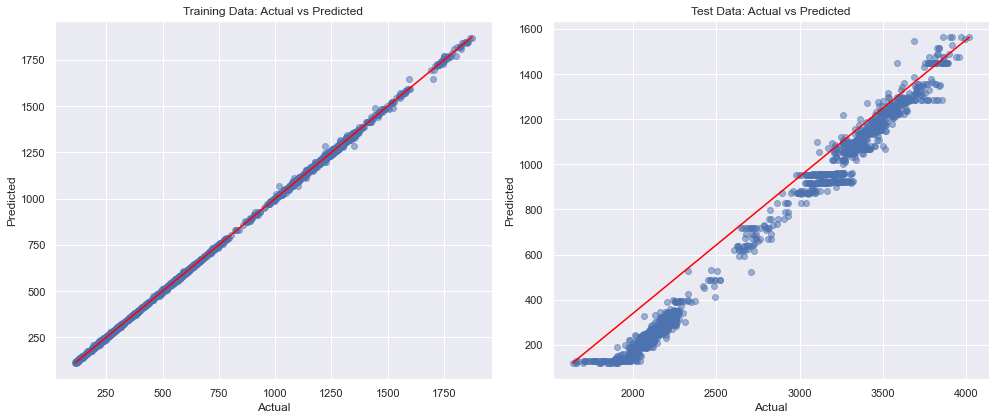

In [124]:
# Plotting Error Graphs
plt.figure(figsize=(14, 6))

# Training data predictions
plt.subplot(1, 2, 1)
plt.scatter(y_train, optimized_rf_model.predict(X_train_scaled), alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')

# Test data predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data: Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], color='red')

plt.tight_layout()
plt.show()

In [125]:
# Predict on the test data using the optimized model
y_test_pred = rf_model.predict(X_test_scaled)

# Calculate MSE and R^2 Score for test data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test Data - Mean Squared Error:", mse_test)
print("Test Data - R^2 Score:", r2_test)

Test Data - Mean Squared Error: 4398635.581385402
Test Data - R^2 Score: -9.346494611400097


<h2> Observation:</h2>

1. The test result for the stock prices didn't give a good result
2. Mean square error is very high for this case

# Let's try Random Forest again, without data scaling

In [146]:
# Calculate the number of rows for the split
total_rows = len(tcs)
split_point = int(total_rows * 0.7)

# Split the data into training and testing sets
train_data = tcs[:split_point]
test_data = tcs[split_point:]


# Train Data

In [147]:
X_transformed = pipeline.transform(train_data)

In [148]:
# Shift the 'Close' column to create the target variable for next day prediction
y_train = X_transformed['Close'].shift(-1)

# Remove the last row from X_transformed as its corresponding target is NaN after shifting
X_train = X_transformed.iloc[:-1, :]

# Drop the 'Close' column from X_train as it's now the target variable
X_train = X_train.drop('Close', axis=1)

# Also, drop the first row from y_train to align with X_train
y_train = y_train.iloc[:-1]

# Check the first few rows of X_train and y_train
print(X_train.shape)
print(y_train.shape)


(2952, 4)
(2952,)


In [149]:
X_train

,RSI,MACD,OBV,High
19,55.203913,4.070498,23667144.0,214.987503
20,61.082580,3.998469,21286896.0,214.987503
21,54.247363,3.744304,19633392.0,213.862503
22,59.311005,3.957203,23030328.0,217.494995
23,61.022135,4.177625,26575944.0,218.737503
...,...,...,...,...
3106,73.911354,30.432013,240414752.0,1885.150024
3107,68.398769,30.120434,235526627.0,1871.000000
3108,68.694004,29.935919,239032903.0,1867.400024
3109,64.996802,29.737384,241683193.0,1857.800049


In [150]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Optional: Evaluate the model using the training data itself
y_train_pred_rf = rf_model.predict(X_train)
mse_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_rf = r2_score(y_train, y_train_pred_rf)

print("Random Forest Regressor - Mean Squared Error:", mse_rf)
print("Random Forest Regressor - R^2 Score:", r2_rf)

Random Forest Regressor - Mean Squared Error: 35.64413538625229
Random Forest Regressor - R^2 Score: 0.9998301803750114


<h2> Test Data

In [151]:
X_transformed = pipeline.transform(test_data)

In [152]:
# Shift the 'Close' column to create the target variable for next day prediction
y_test = X_transformed['Close'].shift(-1)

# Remove the last row from X_transformed as its corresponding target is NaN after shifting
X_test = X_transformed.iloc[:-1, :]

# Drop the 'Close' column from X_train as it's now the target variable
X_test = X_test.drop('Close', axis=1)

# Also, drop the first row from y_train to align with X_train
y_test = y_test.iloc[:-1]

# Check the first few rows of X_train and y_train
print(X_test.shape)
print(y_test.shape)


(1315, 4)
(1315,)


In [153]:
# Predict on the test data using the optimized model
y_test_pred = rf_model.predict(X_test)

# Calculate MSE and R^2 Score for test data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test Data - Mean Squared Error:", mse_test)
print("Test Data - R^2 Score:", r2_test)

Test Data - Mean Squared Error: 1432541.1093579796
Test Data - R^2 Score: -2.3696310126953413


<h2>Observation:</h2>

1. We can observe a reduce in MSE for this case but still it is very high
2. Our error is very less for Train data but high for Test data (this can be due to overfitting)

# Since it is a Time series, let's try and scale the entire dataset together

We will import the transformers using our python module now

In [154]:
tcs

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-12-02,194.332504,196.800003,192.632507,193.750000,139.145081,4784360.0
1,2005-12-05,194.000000,194.262497,190.782501,191.419998,137.471786,1913080.0
2,2005-12-06,191.875000,196.250000,190.787506,194.250000,139.504196,3233064.0
3,2005-12-07,195.250000,200.000000,195.037506,199.445007,143.235077,5618952.0
4,2005-12-08,199.375000,203.087494,199.032501,202.070007,145.120239,9585192.0
...,...,...,...,...,...,...,...
4442,2023-11-24,3494.250000,3504.550049,3453.000000,3457.100098,3457.100098,1989733.0
4443,2023-11-28,3457.100098,3481.250000,3433.000000,3470.149902,3470.149902,1689195.0
4444,2023-11-29,3481.000000,3518.000000,3475.800049,3513.750000,3513.750000,1441634.0
4445,2023-11-30,3499.449951,3516.649902,3481.000000,3487.600098,3487.600098,3266235.0


In [155]:
from tcs import transform_stock_data
X_transformed = transform_stock_data(tcs)

In [156]:
# Shift the 'Close' column to create the target variable for next day prediction
y_data = X_transformed['Close'].shift(-1)

# Remove the last row from X_transformed as its corresponding target is NaN after shifting
X_data = X_transformed.iloc[:-1, :]

# Drop the 'Close' column from X_train as it's now the target variable
X_data = X_data.drop('Close', axis=1)

# Also, drop the first row from y_train to align with X_train
y_data = y_data.iloc[:-1]

# Check the first few rows of X_train and y_train
print(X_data.shape)
print(y_data.shape)

(4287, 4)
(4287,)


In [157]:
X_data

,RSI,MACD,OBV,SMA_20
19,55.203913,4.070498,23667144.0,207.228001
20,61.082580,3.998469,21286896.0,208.183376
21,54.247363,3.744304,19633392.0,209.159876
22,59.311005,3.957203,23030328.0,210.279876
23,61.022135,4.177625,26575944.0,211.202000
...,...,...,...,...
4441,71.240099,12.764400,432615744.0,3404.707495
4442,63.591009,11.432978,430626011.0,3410.725000
4443,62.005866,11.300561,432315206.0,3416.684998
4444,67.552678,14.546104,433756840.0,3423.444995


In [158]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit the scaler to the X_train data and transform it
X_data = scaler.fit_transform(X_data)

X_data

array([[0.53137821, 0.49303181, 0.21986007, 0.02328674],
       [0.59644382, 0.49275911, 0.2160795 , 0.02354276],
       [0.52079104, 0.49179684, 0.21345323, 0.02380444],
       ...,
       [0.60666283, 0.52040481, 0.86891968, 0.88336233],
       [0.66805544, 0.53269243, 0.87120944, 0.88517388],
       [0.61244262, 0.53379418, 0.86602165, 0.88676637]])

In [159]:
# Calculate the number of rows for the split
total_rows = len(X_data)
split_point = int(total_rows * 0.7)

# Split the data into training and testing sets
X_train = X_data[:split_point]
X_test = X_data[split_point:]

y_train = y_data[:split_point]
y_test = y_data[split_point:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3000, 4), (1287, 4), (3000,), (1287,))

In [160]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Optional: Evaluate the model using the training data itself
y_train_pred_rf = rf_model.predict(X_train)
mse_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_rf = r2_score(y_train, y_train_pred_rf)

print("Random Forest Regressor - Mean Squared Error:", mse_rf)
print("Random Forest Regressor - R^2 Score:", r2_rf)

Random Forest Regressor - Mean Squared Error: 38.43742475117094
Random Forest Regressor - R^2 Score: 0.9998343902237904


In [161]:
# Predict on the test data using the optimized model
y_test_pred = rf_model.predict(X_test)

# Calculate MSE and R^2 Score for test data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test Data - Mean Squared Error:", mse_test)
print("Test Data - R^2 Score:", r2_test)

Test Data - Mean Squared Error: 1036530.0750030471
Test Data - R^2 Score: -1.4653248977456195


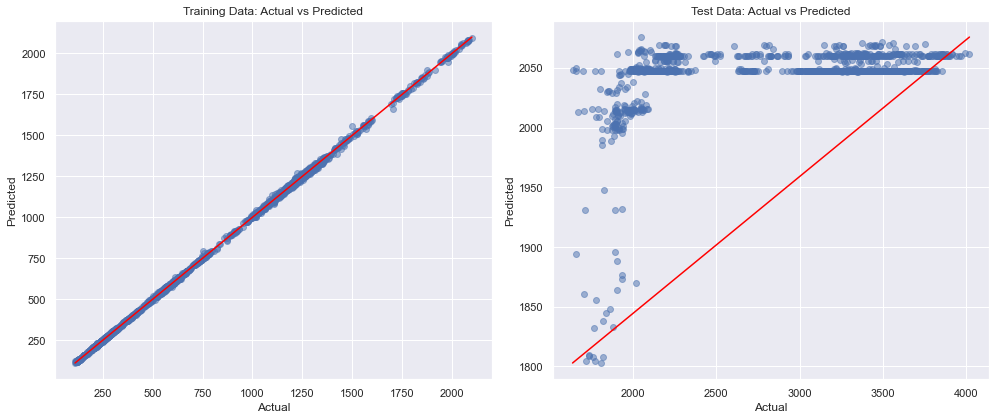

In [162]:
# Plotting Error Graphs
plt.figure(figsize=(14, 6))

# Training data predictions
plt.subplot(1, 2, 1)
plt.scatter(y_train, rf_model.predict(X_train), alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')

# Test data predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data: Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], color='red')

plt.tight_layout()
plt.show()

In [163]:
# Initialize the Random Forest Regressor with the best parameters
optimized_rf_model = RandomForestRegressor(
    bootstrap=False,
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42  # For reproducibility
)

# Train the model
optimized_rf_model.fit(X_train, y_train)

# After training, you can use optimized_rf_model.predict(X_test_scaled) to make predictions on new, unseen data.

# Optional: Evaluate the model using the training data itself
y_train_pred_optimized = optimized_rf_model.predict(X_train)
mse_optimized = mean_squared_error(y_train, y_train_pred_optimized)
r2_optimized = r2_score(y_train, y_train_pred_optimized)

In [164]:
mse_optimized, r2_optimized

(23.41891142601763, 0.999899098321351)

In [165]:
# Predict on the test data using the optimized model
y_test_pred = optimized_rf_model.predict(X_test)

# Calculate MSE and R^2 Score for test data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test Data - Mean Squared Error:", mse_test)
print("Test Data - R^2 Score:", r2_test)

Test Data - Mean Squared Error: 1049489.775857245
Test Data - R^2 Score: -1.4961487724731284


<h2>Observations:</h2>

1. The Mean square error is reduced, but still very high.
2. We might need to switch to other Algorithms for better results

<b> NOTE:</b> We can now use our python function for transformation of test and train data

# 3. Support Vector Machines

In [168]:
tcs = pd.read_csv("./TCS_full.csv")
tcs.shape

(5301, 7)

In [169]:
# Check the date range of the dataset
earliest_date = tcs['Date'].min()
latest_date = tcs['Date'].max()

earliest_date, latest_date

('2002-08-12', '2023-12-01')

<h3> import transformation module and prepare data

In [170]:
from tcs import transform_stock_data
X_transformed = transform_stock_data(tcs)

In [171]:
# Shift the 'Close' column to create the target variable for next day prediction
y_data = X_transformed['Close'].shift(-1)

# Remove the last row from X_transformed as its corresponding target is NaN after shifting
X_data = X_transformed.iloc[:-1, :]

# Drop the 'Close' column from X_train as it's now the target variable
X_data = X_data.drop('Close', axis=1)

# Also, drop the first row from y_train to align with X_train
y_data = y_data.iloc[:-1]

# Check the first few rows of X_train and y_train
print(X_data.shape)
print(y_data.shape)

(4834, 4)
(4834,)


In [172]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit the scaler to the X_train data and transform it
X_data = scaler.fit_transform(X_data)

X_data

array([[6.59557573e-01, 4.81408439e-01, 4.06256431e-02, 8.20649423e-04],
       [6.13351667e-01, 4.80853402e-01, 3.94958430e-02, 8.36869072e-04],
       [5.64204458e-01, 4.80381707e-01, 3.94958430e-02, 8.60133664e-04],
       ...,
       [5.90607026e-01, 5.20404811e-01, 8.94147046e-01, 8.85906641e-01],
       [6.50374831e-01, 5.32692432e-01, 8.95996125e-01, 8.87678680e-01],
       [5.96233855e-01, 5.33794177e-01, 8.91806762e-01, 8.89236424e-01]])

In [173]:
# Calculate the number of rows for the split
total_rows = len(X_data)
split_point = int(total_rows * 0.7)

# Split the data into training and testing sets
X_train = X_data[:split_point]
X_test = X_data[split_point:]

y_train = y_data[:split_point]
y_test = y_data[split_point:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3383, 4), (1451, 4), (3383,), (1451,))

In [174]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svr_model.fit(X_train, y_train)

# Predict on the Train set
y_train_pred_svr = svr_model.predict(X_train)

# Calculate MSE and R^2 Score for the train set
mse_train_svr = mean_squared_error(y_train, y_train_pred_svr)
r2_train_svr = r2_score(y_train, y_train_pred_svr)

In [175]:
print("SVR - Train Data - Mean Squared Error:", mse_train_svr)
print("SVR - Train Data - R^2 Score:", r2_train_svr)

SVR - Train Data - Mean Squared Error: 20605.609031433956
SVR - Train Data - R^2 Score: 0.8960794496749841


In [176]:
# Predict on the scaled test data
y_test_pred_optimized = svr_model.predict(X_test)

# Calculate MSE and R^2 Score for the test data
mse_test_optimized = mean_squared_error(y_test, y_test_pred_optimized)
r2_test_optimized = r2_score(y_test, y_test_pred_optimized)

print("Optimized SVR - Test Data - Mean Squared Error:", mse_test_optimized)
print("Optimized SVR - Test Data - R^2 Score:", r2_test_optimized)

Optimized SVR - Test Data - Mean Squared Error: 4450028.033492736
Optimized SVR - Test Data - R^2 Score: -7.892087372537157


# Hyperparameter Tuning

We manually tried some for parameters near the optimised parameter from grid search and further the loss was reduced

Best parameter : C=500, gamma=0.175, kernel='rbf'

In [177]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the SVR model with the best parameters
optimized_svr_model = SVR(C=500, gamma=0.175, kernel='rbf')

# Train the model on the scaled training data
optimized_svr_model.fit(X_train, y_train)

# Predict on the scaled train data
y_train_pred_optimized = optimized_svr_model.predict(X_train)

# Calculate MSE and R^2 Score for the test data
mse_train_optimized = mean_squared_error(y_train, y_train_pred_optimized)
r2_train_optimized = r2_score(y_train, y_train_pred_optimized)

print("Optimized SVR - train Data - Mean Squared Error:", mse_train_optimized)
print("Optimized SVR - train Data - R^2 Score:", r2_train_optimized)


Optimized SVR - train Data - Mean Squared Error: 284.5685551465361
Optimized SVR - train Data - R^2 Score: 0.9985648315072411


In [178]:
# Predict on the scaled test data
y_test_pred_optimized = optimized_svr_model.predict(X_test)

# Calculate MSE and R^2 Score for the test data
mse_test_optimized = mean_squared_error(y_test, y_test_pred_optimized)
r2_test_optimized = r2_score(y_test, y_test_pred_optimized)

print("Optimized SVR - Test Data - Mean Squared Error:", mse_test_optimized)
print("Optimized SVR - Test Data - R^2 Score:", r2_test_optimized)

Optimized SVR - Test Data - Mean Squared Error: 48379.75058642185
Optimized SVR - Test Data - R^2 Score: 0.9033271327645174


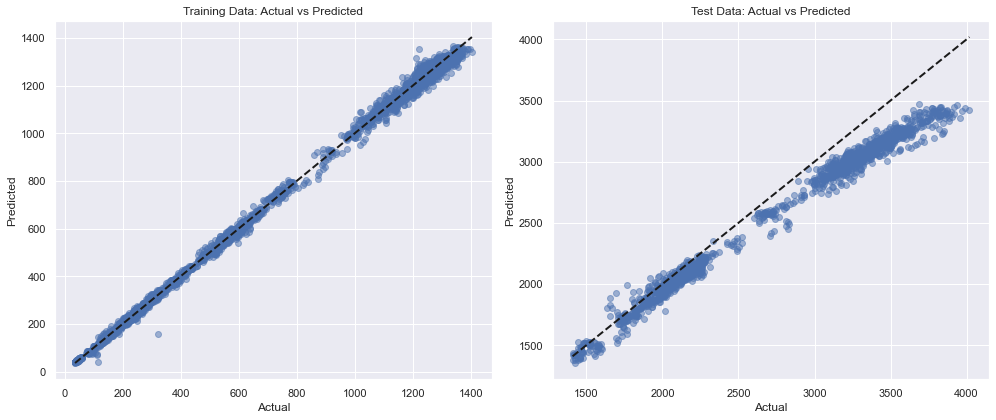

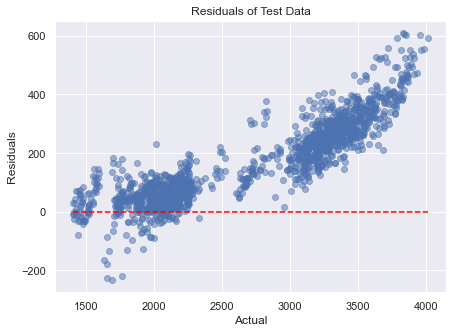

In [179]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(14, 6))

# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_optimized, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Scatter plot for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_optimized, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

# Residual plot for test data
plt.figure(figsize=(7, 5))
residuals_test = y_test - y_test_pred_optimized
plt.scatter(y_test, residuals_test, alpha=0.5)
plt.hlines(0, y_test.min(), y_test.max(), colors='red', linestyles='--')
plt.title('Residuals of Test Data')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.show()


<h2>Observations:</h2>

1. Optimized SVR - Test Data - Mean Squared Error: 48379.75058642185
2. Optimized SVR - Test Data - R^2 Score: 0.9033271327645174
3. SVR with hyperparameter tuning is way better than Random forest Regressor and Linear model.
4. Mean Squared Error for random forest was 1049489.775857245 as compared to SVC 48379.75058642185
5. We will try and further optimise our predictions.
